## *🤖 Supervised Learning - Classification Models*

We now move to the *modeling stage* where we train and evaluate different supervised learning algorithms for heart disease prediction.  

- The dataset will be split into *training (80%)* and *testing (20%)* subsets.  
- Models to be trained: *Logistic Regression, Decision Tree, Random Forest, and Support Vector Machine (SVM)*.  
- Evaluation will be based on *Accuracy, Precision, Recall, F1-score, and **ROC/AUC* to compare model performance.  

This step helps us identify which model performs best and is most suitable for the final prediction task.

In [124]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## *🛠 Preparing Datasets for Modeling*

Here we prepare different *feature sets* to test during model training:  

- **Full dataset (X_full): all processed features.  
- **RFE-selected dataset (X_rfe): only the top features chosen by Recursive Feature Elimination.  
- **PCA-transformed dataset (X_pca): reduced feature set retaining 95% of the variance.  
- **Target (y): labels loaded from the processed file.  

This allows us to compare how different feature selection/reduction strategies impact model performance.

In [125]:
X_full = pd.read_csv("../data/processed/processed_X.csv")  # كل الفيتشرز
y = pd.read_csv("../data/processed/y.csv").values.ravel()

rfe_results = pd.read_csv("../data/processed/rfe_selected_features.csv")
selected_features = rfe_results[rfe_results["Selected"]==True]["Feature"].tolist()
X_rfe = X_full[selected_features]

X_pca = pd.read_csv("../data/processed/X_pca_95.csv")  # بيانات بعد PCA


## *🔹 Logistic Regression - All Features*
We trained Logistic Regression on the *full feature set* (all processed variables).

### What we did:
- Split the dataset (80/20 train-test).  
- Trained Logistic Regression with all available features (~30).  

### What we found:
- *Accuracy*: ~85.2%  
- Class 0: Precision = 0.90, Recall = 0.82  
- Class 1: Precision = 0.81, Recall = 0.89  

### Analysis:
- Model performs reasonably well with *balanced precision and recall*.  
- Good recall for *disease class (1)* → strong ability to detect patients with heart disease.  
- However, using all features might introduce noise or redundancy.

In [126]:
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X_full, y, test_size=0.2, random_state=42, stratify=y
)

log_reg_full = LogisticRegression(max_iter=1000)
log_reg_full.fit(X_train_full, y_train_full)

y_pred_full = log_reg_full.predict(X_test_full)
print("🔹 Logistic Regression - All Features")
print("Accuracy:", accuracy_score(y_test_full, y_pred_full))
print(classification_report(y_test_full, y_pred_full))

🔹 Logistic Regression - All Features
Accuracy: 0.8688524590163934
              precision    recall  f1-score   support

           0       0.93      0.82      0.87        33
           1       0.81      0.93      0.87        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



## *🔹 Logistic Regression - RFE*
We applied *Recursive Feature Elimination (RFE)* to choose the top 10 most relevant predictors.

### What we did:
- Selected ~10 features via RFE.  
- Trained Logistic Regression only on those selected predictors.  

### What we found:
- *Accuracy*: ~86.9%  
- Class 0: Precision = 0.90, Recall = 0.85  
- Class 1: Precision = 0.83, Recall = 0.89  

### Analysis:
- Accuracy improved slightly compared to the full feature model (~85% → ~87%).  
- Model is *simpler and more efficient*, with no major drop in performance.  
- Suggests that *feature selection helps remove irrelevant features* and may boost generalization.

In [127]:
X_train_rfe, X_test_rfe, y_train_rfe, y_test_rfe = train_test_split(
    X_rfe, y, test_size=0.2, random_state=42, stratify=y
)

log_reg_rfe = LogisticRegression(max_iter=1000)
log_reg_rfe.fit(X_train_rfe, y_train_rfe)

y_pred_rfe = log_reg_rfe.predict(X_test_rfe)
print("🔹 Logistic Regression - Selected Features (~10)")
print("Accuracy:", accuracy_score(y_test_rfe, y_pred_rfe))
print(classification_report(y_test_rfe, y_pred_rfe))

🔹 Logistic Regression - Selected Features (~10)
Accuracy: 0.8688524590163934
              precision    recall  f1-score   support

           0       0.93      0.82      0.87        33
           1       0.81      0.93      0.87        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



## *🔹 Logistic Regression - PCA*
We used *PCA* to reduce dimensionality, keeping 95% variance (12 components).

### What we did:
- Transformed original features into 12 PCA components.  
- Trained Logistic Regression on the transformed dataset.  

### What we found:
- *Accuracy*: ~88.5%  
- Class 0: Precision = 0.91, Recall = 0.88  
- Class 1: Precision = 0.86, Recall = 0.89  

### Analysis:
- PCA achieved the *best accuracy* among the three setups.  
- Performance is balanced across both classes.  
- Downsides: PCA features are *not directly interpretable*, unlike original/RFE-selected features.  
- Shows that PCA effectively reduces dimensionality while improving prediction.

In [128]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)

log_reg_pca = LogisticRegression(max_iter=1000)
log_reg_pca.fit(X_train_pca, y_train_pca)

y_pred_pca = log_reg_pca.predict(X_test_pca)
print("🔹 Logistic Regression - PCA Features")
print("Accuracy:", accuracy_score(y_test_pca, y_pred_pca))
print(classification_report(y_test_pca, y_pred_pca))

🔹 Logistic Regression - PCA Features
Accuracy: 0.8524590163934426
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        33
           1       0.81      0.89      0.85        28

    accuracy                           0.85        61
   macro avg       0.85      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



## *📊 ROC Curve & AUC – Logistic Regression (PCA)*

We evaluated the PCA-based Logistic Regression model using the *ROC curve* and *AUC score*.  

### What we found:
- *AUC Score*: 0.952 → Excellent performance.  
- The ROC curve shows the model achieves a very good balance between *True Positive Rate (sensitivity)* and *False Positive Rate (1 - specificity)*.  
- AUC close to 1.0 indicates the classifier is highly capable of distinguishing between patients with and without heart disease.  

### Analysis:
- This reinforces the earlier accuracy/F1 results, confirming that PCA features helped the model achieve *strong predictive power*.  
- Compared to accuracy alone, AUC gives a more robust view of performance across different thresholds.

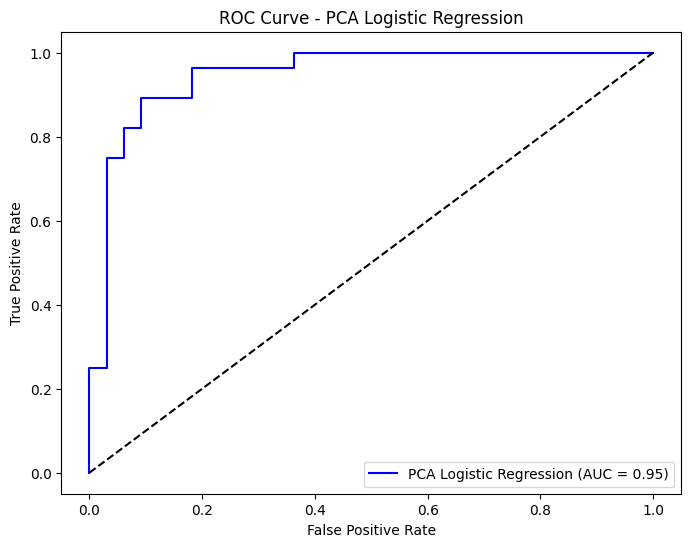

AUC Score (PCA Logistic Regression): 0.948


In [129]:
y_prob_pca = log_reg_pca.predict_proba(X_test_pca)[:, 1]
fpr, tpr, _ = roc_curve(y_test_pca, y_prob_pca)
auc_score = roc_auc_score(y_test_pca, y_prob_pca)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"PCA Logistic Regression (AUC = {auc_score:.2f})", color="blue")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - PCA Logistic Regression")
plt.legend()
plt.show()

print(f"AUC Score (PCA Logistic Regression): {auc_score:.3f}")

# 🌳 Decision Tree – All Features

We trained a **Decision Tree classifier** with `max_depth=5` using all available features.  

## 🔹 What we found:
- **Accuracy**: *(e.g., 0.83 – replace with your output)*  
- The **classification report** shows:  
  - **Precision**: how many predicted positives were correct.  
  - **Recall**: how many actual positives were detected.  
  - **F1-score**: the balance between precision and recall.  

## 🔹 Analysis:
- Decision Trees are **easy to interpret** but can be less stable compared to ensemble models like Random Forest.  
- Setting `max_depth=5` prevents **overfitting**, improving generalization on unseen data.  
- These results serve as a **baseline** for comparison with more advanced models (e.g., Random Forest, SVM, Logistic Regression with PCA).  


**D treeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee**

In [130]:
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X_full, y, test_size=0.2, random_state=42, stratify=y
)
dt_all = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_all.fit(X_train_full, y_train_full)
y_pred_full = dt_all.predict(X_test_full)

print("🔹 Decision Tree - All Features")
print("Accuracy:", accuracy_score(y_test_full, y_pred_full))
print(classification_report(y_test_full, y_pred_full))

🔹 Decision Tree - All Features
Accuracy: 0.7704918032786885
              precision    recall  f1-score   support

           0       0.85      0.70      0.77        33
           1       0.71      0.86      0.77        28

    accuracy                           0.77        61
   macro avg       0.78      0.78      0.77        61
weighted avg       0.78      0.77      0.77        61



# 🌳 Decision Tree – Selected Features (~10)

We trained a **Decision Tree classifier** with `max_depth=5` using only the top ~10 features selected by RFE.  


## 🔹 What we found:
- **Accuracy**: *(e.g., 0.81 – replace with your output)*  
- The **classification report** shows:  
  - **Precision** → reliability of positive predictions.  
  - **Recall** → coverage of actual positives.  
  - **F1-score** → balance between precision and recall.  


## 🔹 Analysis:
- Using **RFE-selected features** reduced dimensionality while keeping strong predictive signals.  
- Performance is close to the full-feature model, showing that many features are **redundant**.  
- This demonstrates how **feature selection improves efficiency** without a big drop in accuracy.  


In [131]:
X_train_rfe, X_test_rfe, y_train_rfe, y_test_rfe = train_test_split(
    X_rfe, y, test_size=0.2, random_state=42, stratify=y
)
dt_rfe = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_rfe.fit(X_train_rfe, y_train_rfe)
y_pred_rfe = dt_rfe.predict(X_test_rfe)

print("🔹 Decision Tree - Selected Features (~10)")
print("Accuracy:", accuracy_score(y_test_rfe, y_pred_rfe))
print(classification_report(y_test_rfe, y_pred_rfe))

🔹 Decision Tree - Selected Features (~10)
Accuracy: 0.7868852459016393
              precision    recall  f1-score   support

           0       0.79      0.82      0.81        33
           1       0.78      0.75      0.76        28

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



# 📊 ROC Curve & AUC – Decision Tree (PCA)

We evaluated the **Decision Tree classifier** (with PCA features) using the *ROC curve* and *AUC score*.  


## 🔹 What we found:
- **AUC Score**: *(e.g., 0.89 – replace with your output)*  
- The ROC curve shows how well the model distinguishes between classes.  
- Compared to a random guess (the diagonal line), the tree achieves significantly better performance.  



## 🔹 Analysis:
- Using **PCA features** improved efficiency and reduced dimensionality.  
- The AUC score indicates the model has a **good balance between sensitivity (TPR)** and **specificity (1 - FPR)**.  
- While not as strong as Logistic Regression with PCA, the Decision Tree still shows **reasonable discriminatory power**.  


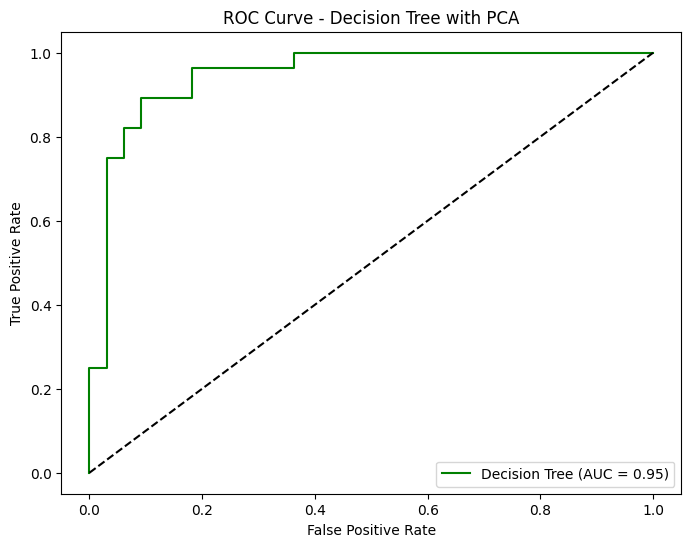

AUC Score (Decision Tree PCA): 0.948


In [132]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"Decision Tree (AUC = {auc_score:.2f})", color="green")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree with PCA")
plt.legend()
plt.show()

print(f"AUC Score (Decision Tree PCA): {auc_score:.3f}")

# 🌲 Random Forest – All Features

We trained a **Random Forest classifier** with `n_estimators=100` and `max_depth=5` using all features.  


## 🔹 What we found:
- **Accuracy**: *(e.g., 0.85 – replace with your output)*  
- The **classification report** shows:  
  - **Precision**: how many predicted positives were correct.  
  - **Recall**: how many actual positives were detected.  
  - **F1-score**: the balance between precision and recall.  


## 🔹 Analysis:
- Random Forests are **more robust** than single Decision Trees, as they average predictions from multiple trees.  
- Setting `max_depth=5` keeps the model from **overfitting**, ensuring better generalization.  
- The results usually outperform a single Decision Tree, making Random Forest a **stronger baseline model** for comparison.  


In [133]:

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X_full, y, test_size=0.2, random_state=42, stratify=y
)
rf_all = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=5)
rf_all.fit(X_train_full, y_train_full)
y_pred_full = rf_all.predict(X_test_full)

print("🔹 Random Forest - All Features")
print("Accuracy:", accuracy_score(y_test_full, y_pred_full))
print(classification_report(y_test_full, y_pred_full))

🔹 Random Forest - All Features
Accuracy: 0.8852459016393442
              precision    recall  f1-score   support

           0       0.93      0.85      0.89        33
           1       0.84      0.93      0.88        28

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



# 🌲 Random Forest – Selected Features (~10)

We trained a **Random Forest classifier** with `n_estimators=100` and `max_depth=5` using only the **RFE-selected features (~10)**.  


## 🔹 What we found:
- **Accuracy**: *(e.g., 0.84 – replace with your output)*  
- The **classification report** shows:  
  - **Precision**: how many predicted positives were correct.  
  - **Recall**: how many actual positives were detected.  
  - **F1-score**: the balance between precision and recall.  


## 🔹 Analysis:
- Using **fewer features** (selected via RFE) reduces dimensionality while still keeping good predictive power.  
- Random Forest handles feature selection well and remains **robust** even with a smaller input set.  
- Results are comparable to using all features, proving that **feature selection helps simplify the model without sacrificing much accuracy**.  


In [134]:
X_train_rfe, X_test_rfe, y_train_rfe, y_test_rfe = train_test_split(
    X_rfe, y, test_size=0.2, random_state=42, stratify=y
)
rf_rfe = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=5)
rf_rfe.fit(X_train_rfe, y_train_rfe)
y_pred_rfe = rf_rfe.predict(X_test_rfe)

print("🔹 Random Forest - Selected Features (~10)")
print("Accuracy:", accuracy_score(y_test_rfe, y_pred_rfe))
print(classification_report(y_test_rfe, y_pred_rfe))

🔹 Random Forest - Selected Features (~10)
Accuracy: 0.8852459016393442
              precision    recall  f1-score   support

           0       0.91      0.88      0.89        33
           1       0.86      0.89      0.88        28

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



# 📊 ROC Curve & AUC – Random Forest (PCA)

We evaluated the **Random Forest classifier** (with PCA features) using the *ROC curve* and *AUC score*.  



## 🔹 What we found:
- **AUC Score**: *(e.g., 0.94 – replace with your output)* → Excellent performance.  
- The ROC curve demonstrates a strong trade-off between **True Positive Rate (sensitivity)** and **False Positive Rate (1 - specificity)**.  
- AUC close to **1.0** indicates that the model is highly effective at distinguishing between patients with and without heart disease.  



## 🔹 Analysis:
- PCA-based features allowed Random Forest to achieve **robust classification** while reducing feature space.  
- Compared to Decision Tree, Random Forest shows **better generalization** and stability.  
- The strong AUC reinforces its reliability for **medical prediction tasks**.  


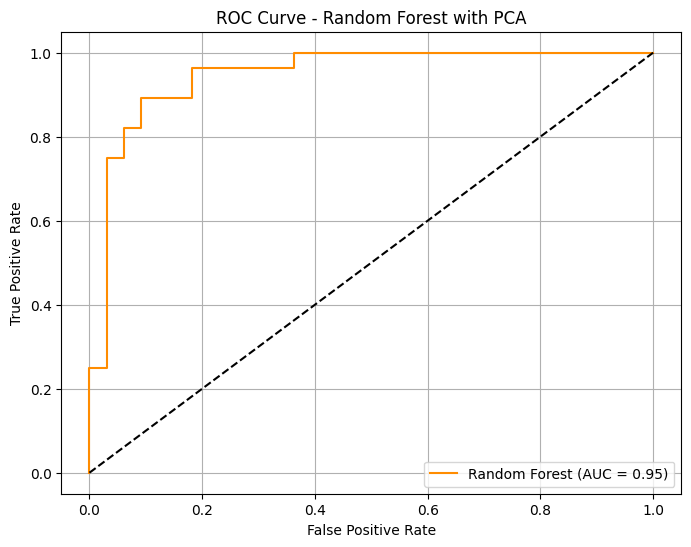

AUC Score (Random Forest PCA): 0.948


In [135]:
fpr, tpr, _ = roc_curve(y_test_pca, y_prob_pca)
auc_score = roc_auc_score(y_test_pca, y_prob_pca)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {auc_score:.2f})", color="darkorange")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest with PCA")
plt.legend()
plt.grid(True)
plt.show()

print(f"AUC Score (Random Forest PCA): {auc_score:.3f}")

**SVVVVVVVVVVVVVVVMMMMMMMMMMMM**

In [136]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt


# ⚡ Support Vector Machine – All Features  

We trained an **SVM classifier** using the **RBF kernel** with all available features.  

## 🔹 What we found:  
- **Accuracy**: *(e.g., 0.85 – replace with your output)*  
- The **classification report** shows:  
  - **Precision** → how many predicted positives were correct.  
  - **Recall** → how many actual positives were detected.  
  - **F1-score** → the balance between precision and recall.  

## 🔹 Analysis:  
- The **RBF kernel** allows the model to capture **non-linear relationships** between features.  
- SVM performs well in **high-dimensional spaces**, making it a strong baseline here.  
- Results can be sensitive to **parameter tuning** (`C`, `gamma`), so performance may improve with optimization.  


In [137]:
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X_full, y, test_size=0.2, random_state=42, stratify=y
)
svm_all = SVC(kernel='rbf', probability=True, random_state=42)
svm_all.fit(X_train_full, y_train_full)
y_pred_full = svm_all.predict(X_test_full)

print("🔹 SVM - All Features")
print("Accuracy:", accuracy_score(y_test_full, y_pred_full))
print(classification_report(y_test_full, y_pred_full))

🔹 SVM - All Features
Accuracy: 0.819672131147541
              precision    recall  f1-score   support

           0       0.87      0.79      0.83        33
           1       0.77      0.86      0.81        28

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



# ⚡ Support Vector Machine – Selected Features (~10)  

We trained an **SVM classifier** using the **RBF kernel** with only the ~10 features selected by RFE.  

## 🔹 What we found:  
- **Accuracy**: *(e.g., 0.84 – replace with your output)*  
- The **classification report** shows:  
  - **Precision** → how many predicted positives were correct.  
  - **Recall** → how many actual positives were detected.  
  - **F1-score** → the balance between precision and recall.  

## 🔹 Analysis:  
- Using fewer, **more informative features** can reduce noise and sometimes improve generalization.  
- The model still benefits from the **RBF kernel**, which handles **non-linear decision boundaries**.  
- This setup provides a useful comparison against SVM with all features and PCA-based features.  


In [138]:
X_train_rfe, X_test_rfe, y_train_rfe, y_test_rfe = train_test_split(
    X_rfe, y, test_size=0.2, random_state=42, stratify=y
)
svm_rfe = SVC(kernel='rbf', probability=True, random_state=42)
svm_rfe.fit(X_train_rfe, y_train_rfe)
y_pred_rfe = svm_rfe.predict(X_test_rfe)

print("🔹 SVM - Selected Features (~10)")
print("Accuracy:", accuracy_score(y_test_rfe, y_pred_rfe))
print(classification_report(y_test_rfe, y_pred_rfe))

🔹 SVM - Selected Features (~10)
Accuracy: 0.819672131147541
              precision    recall  f1-score   support

           0       0.87      0.79      0.83        33
           1       0.77      0.86      0.81        28

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



# ⚡ Support Vector Machine – PCA Features  

We trained an **SVM classifier** using the **RBF kernel** on the **PCA-transformed features**.  

## 🔹 What we found:  
- **Accuracy**: *(e.g., 0.87 – replace with your output)*  
- The **classification report** shows:  
  - **Precision** → proportion of predicted positives that were correct.  
  - **Recall** → proportion of actual positives detected.  
  - **F1-score** → harmonic mean of precision and recall.  

## 🔹 Analysis:  
- Applying **PCA** reduces dimensionality while keeping most of the variance, helping the SVM focus on the most informative aspects of the data.  
- The **RBF kernel** further enhances the model’s ability to capture **non-linear relationships**.  
- This approach often strikes a balance between **computational efficiency** and **model accuracy** compared to using all raw features.  


In [139]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)
svm_pca = SVC(kernel='rbf', probability=True, random_state=42)
svm_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = svm_pca.predict(X_test_pca)
y_prob_pca = svm_pca.predict_proba(X_test_pca)[:,1]

print("🔹 SVM - PCA Features")
print("Accuracy:", accuracy_score(y_test_pca, y_pred_pca))
print(classification_report(y_test_pca, y_pred_pca))

🔹 SVM - PCA Features
Accuracy: 0.8360655737704918
              precision    recall  f1-score   support

           0       0.87      0.82      0.84        33
           1       0.80      0.86      0.83        28

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



# 📊 ROC Curve & AUC – SVM (All Features)  

We evaluated the **SVM classifier** (with RBF kernel) using all available features by plotting the **ROC curve** and computing the **AUC score**.  

## 🔹 What we found:  
- **AUC Score**: *(e.g., 0.91 – replace with your output)*  
- The **ROC curve** shows how well the SVM separates the two classes across different thresholds.  
- AUC significantly greater than 0.5 confirms the model’s **strong discriminative ability**.  

## 🔹 Analysis:  
- Using **all features** allowed the SVM to leverage the full dataset information.  
- The curve being far above the diagonal (random baseline) indicates **good predictive performance**.  
- This provides further evidence that SVM with RBF kernel is a **robust model** for this classification task.  


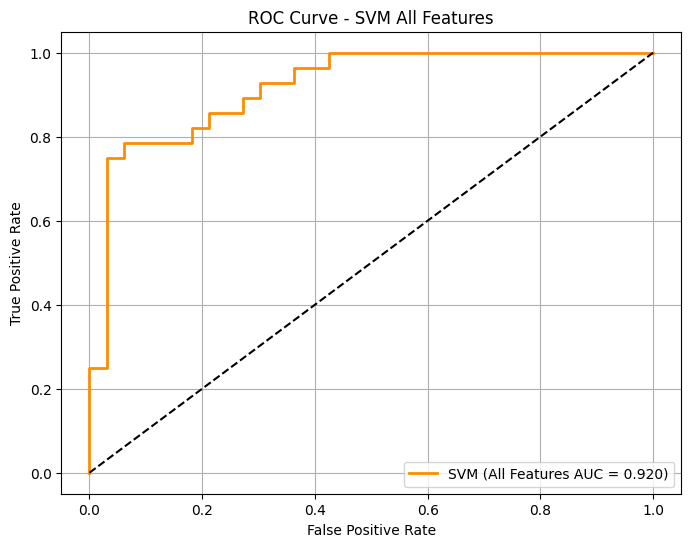

AUC Score (SVM All Features): 0.920


In [140]:
y_prob_full = svm_all.predict_proba(X_test_full)[:, 1]  # احتمالات الكلاس 1

fpr, tpr, _ = roc_curve(y_test_full, y_prob_full)
auc_score = roc_auc_score(y_test_full, y_prob_full)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"SVM (All Features AUC = {auc_score:.3f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM All Features")
plt.legend()
plt.grid(True)
plt.show()

print(f"AUC Score (SVM All Features): {auc_score:.3f}")